#  Classification - Loan Eligibility Prediction


# Problem Statement :-
Dream Housing Finance company deals in all home loans. They have a presence across all urban, semi-urban and rural areas. Customers first apply for a home loan after that company validates the customer’s eligibility for a loan. The company wants to automate the loan eligibility process (real-time) based on customer detail provided while filling out the online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History, and others. To automate this process, they have given a problem to identify the customer segments, that are eligible for loan amounts so that they can specifically target these customers.

# Business Goal :-
We are required to model to identify the key factors that are involved with whether or not a loan application will be accepted. It will be used by the management to understand how exactly the loan satues vary with the independent variables. They can accordingly manipulate the business strategy. the model will be a good way for management to understand the business strategy since we don't want to grant loans to applicants who are unable to repay them, since it would hurt the company.

In [3]:
#import libraies 
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Reading and Understanding the Data

In [4]:
data = pd.read_csv('train_u6lujuX_CVtuZ9i (1).csv')
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [75]:
#data.info()

In [76]:
data.describe()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.817590,0.653094,0.827362,0.781759,0.133550,5403.459283,1621.245798,145.752443,342.410423,0.855049,1.087948,0.687296
std,0.386497,0.476373,1.212833,0.413389,0.340446,6109.041673,2926.248369,84.107233,64.428629,0.352339,0.815081,0.463973
min,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,1.000000,0.000000,2877.500000,0.000000,100.250000,360.000000,1.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,1.000000,0.000000,3812.500000,1188.500000,128.000000,360.000000,1.000000,1.000000,1.000000
75%,1.000000,1.000000,1.000000,1.000000,0.000000,5795.000000,2297.250000,164.750000,360.000000,1.000000,2.000000,1.000000
max,1.000000,1.000000,4.000000,1.000000,1.000000,81000.000000,41667.000000,700.000000,480.000000,1.000000,2.000000,1.000000


Observations:

1.ApplicantIncome, CoapplicantIncome, LoanAmount, Loan_Amount_Term, Credit_History, and Loan_Status are numeric data types. The rest of the variables are of the object data type.



2.Loan_ID column is an identifier. Let's check if each entry of the column is unique.

# Step 2 : Data Cleaning and Preparation

In [77]:
#checking missing values
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

observations

1.There are several columns with less than 614 non-null entries i.e. these columns have missing values.


## Imputing missing values

In [78]:
#Imputing missing values with mode for the categorical variables 
for col in ['Gender', 'Married', 'Dependents', 'Self_Employed', 'Loan_Amount_Term', 'Credit_History']:
    data[col].fillna(value=data[col].mode()[0], inplace=True)

In [79]:
#Imputing null values in loan amount with the median
data.LoanAmount.fillna(value=data.LoanAmount.median(), inplace=True)

In [80]:
# glimplse of the dataset 
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,1,0,5849,0.0,128.0,360.0,1.0,1,1
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,1,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,1,1
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,1,1


In [81]:
#checking missing value after imputation.
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

Finally, we need to encode our loan status column to make it eligible for modeling

In [82]:
data.replace({'Loan_Status':{'N':0,'Y': 1}},inplace = True)

In [83]:
data['Dependents'].value_counts()

0    360
1    102
2    101
4     51
Name: Dependents, dtype: int64

In [84]:
data.replace({'Dependents': {'3+':4}},inplace = True)

In [85]:
data['Dependents'].value_counts()

0    360
1    102
2    101
4     51
Name: Dependents, dtype: int64

#  Step 4:-  Exploratory Data Analysis

### Univariate Data Analysis 

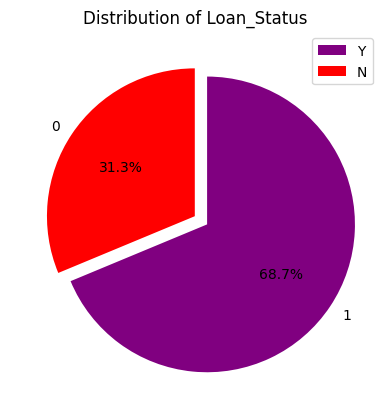

In [86]:
import matplotlib.pyplot as plt
target_freq=data['Loan_Status'].value_counts()
plt.pie(target_freq, labels=target_freq.index,autopct='%1.1f%%', startangle=90, counterclock=False,colors=['purple','red'],explode=[0.1, 0])
plt.title('Distribution of Loan_Status')
plt.legend(['Y','N'])
plt.show()

This is not a imbalaned dataset. so we donot use any kind of undersampling or oversampling technique.

In [17]:
#Creating a list of numerical columns
num_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']

#printing summary statistics

data[num_cols].describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
count,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,145.752443,342.410423
std,6109.041673,2926.248369,84.107233,64.428629
min,150.000000,0.000000,9.000000,12.000000
25%,2877.500000,0.000000,100.250000,360.000000
50%,3812.500000,1188.500000,128.000000,360.000000
75%,5795.000000,2297.250000,164.750000,360.000000
max,81000.000000,41667.000000,700.000000,480.000000


## Observations:

1.The mean applicant income is around $5403.46


2.The minimum value for applicant income is $150 which is very small and could be an outlier since it is very far from both the mean and the median.


3.There are a good number of co applicants with no income, as can be observed by thet fact that the 25% quantile of coapplicants have an income of 0.

Checking the distribution and outliers for each column in the data

ApplicantIncome
Skew : 6.54


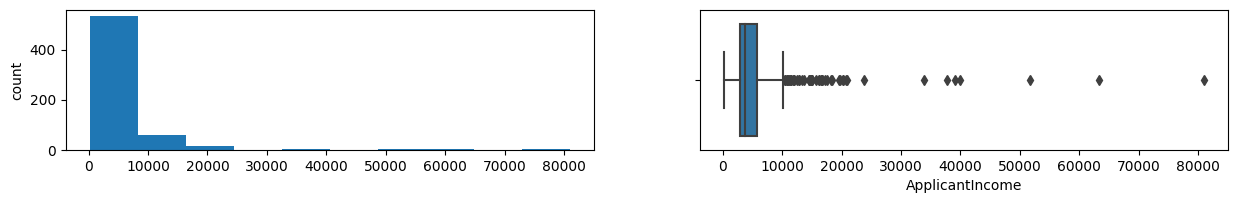

CoapplicantIncome
Skew : 7.49


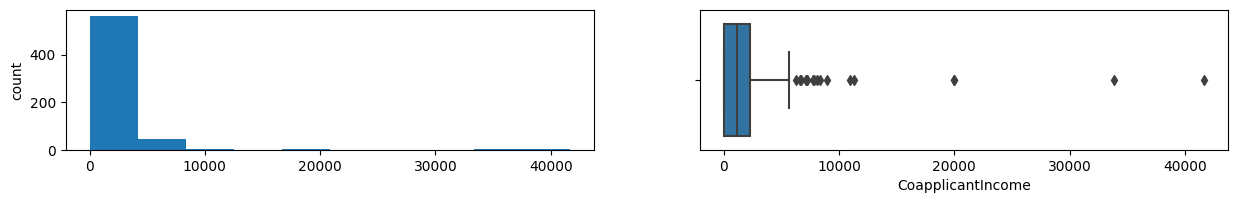

LoanAmount
Skew : 2.74


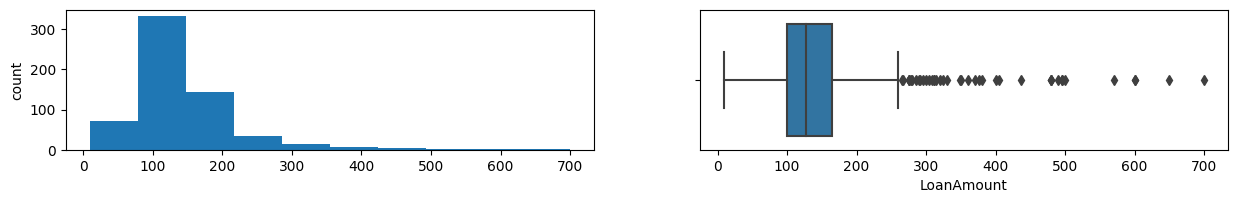

Loan_Amount_Term
Skew : -2.4


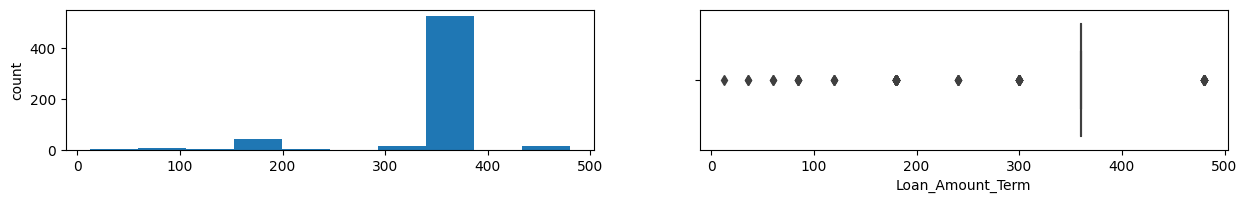

In [18]:
for col in ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term'] :
    print(col)
    print('Skew :',round(data[col].skew(),2))
    plt.figure(figsize=(15,4))
    plt.subplot(2,2,1)
    data[col].hist(bins=10, grid=False)
    plt.ylabel('count')
    plt.subplot(2,2,2)
    sns.boxplot(x=data[col])
    plt.show()

### Observations:

1.ApplicantIncome and CoapplicantIncome are highly skewed to the right and have many outliers which can be expected as the data contains different types of areas - Rural, Urban & Semi-Urban.


2.Loan_Amount_Term is highly skewed to the left.

## Checking percentage of each category for categorical variables

In [19]:
#Creating list of categorical columns
cat_col= ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Credit_History','Property_Area', 'Loan_Status']

for col in cat_col:
    print(data[col].value_counts(normalize=True)) #Write your code here
    print('*'*40)

Male      0.81759
Female    0.18241
Name: Gender, dtype: float64
****************************************
Yes    0.653094
No     0.346906
Name: Married, dtype: float64
****************************************
0    0.586319
1    0.166124
2    0.164495
4    0.083062
Name: Dependents, dtype: float64
****************************************
Graduate        0.781759
Not Graduate    0.218241
Name: Education, dtype: float64
****************************************
No     0.86645
Yes    0.13355
Name: Self_Employed, dtype: float64
****************************************
1.0    0.855049
0.0    0.144951
Name: Credit_History, dtype: float64
****************************************
Semiurban    0.379479
Urban        0.328990
Rural        0.291531
Name: Property_Area, dtype: float64
****************************************
1    0.687296
0    0.312704
Name: Loan_Status, dtype: float64
****************************************


## Observations:

1.The vast majority of applicants are male (81%).


2.65% of applicants are married, and 57% of them have no dependents.


3.78% of the applicants are graduates.


4.85% of the applicants are self employed.


5.84% of the applicants have credit histories that meet the required guidelines.


6.The property area among the applicants is roughly evenly split across semiurban, urban, and rural, with semi-urban having a slightly higher portion (37.9%)

## Bivariate Analysis

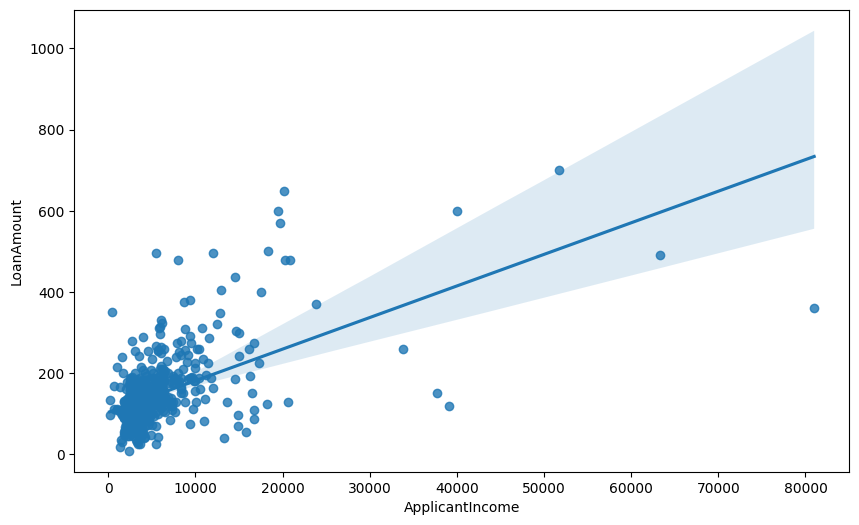

In [20]:
plt.figure(figsize=(10,6))
sns.regplot(x='ApplicantIncome',y='LoanAmount',data=data)
plt.show()

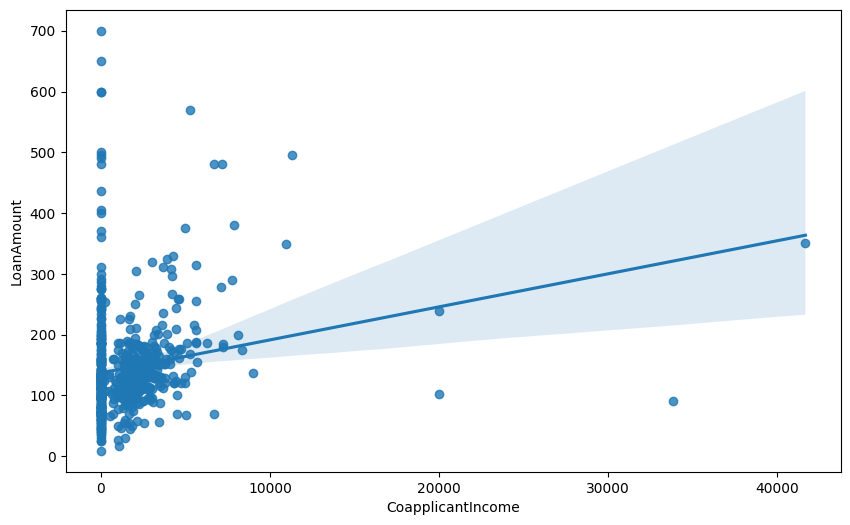

In [21]:
plt.figure(figsize=(10,6))
sns.regplot(x='CoapplicantIncome',y='LoanAmount',  data=data)
plt.show()

### Observations:

1.The plot shows that the loan amount is positively correlated with CoapplicantIncome and ApplicantIncome . This implies that the loan amount for higher income applicants is progressively higher.


2.There are some outliers visible, showing applicants with low coapplicantincome having been given loans of a higher amount.

<Axes: xlabel='Education', ylabel='count'>

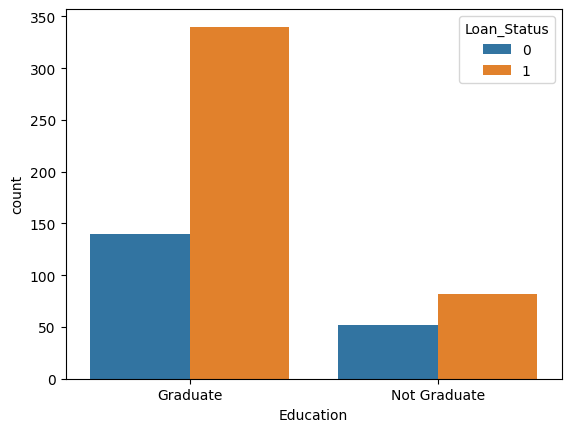

In [22]:
sns.countplot(x=data.Education, hue=data.Loan_Status)

## Observations:

We can see that graduate customers are more likely to get loans.

<Axes: xlabel='Gender', ylabel='count'>

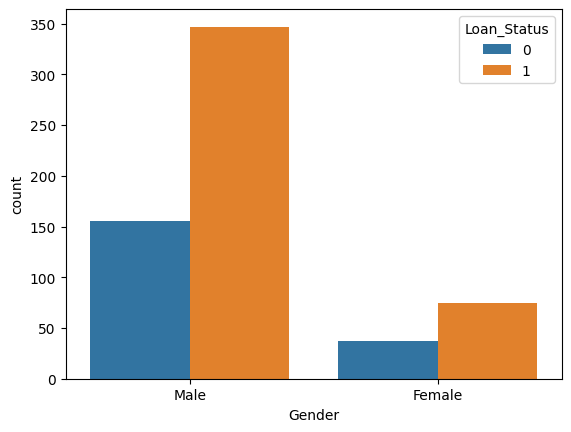

In [23]:
sns.countplot(data= data,x = 'Gender',hue = 'Loan_Status')

## Observations:

We can see that Male customers are more likely to get loans.

<Axes: xlabel='Married', ylabel='count'>

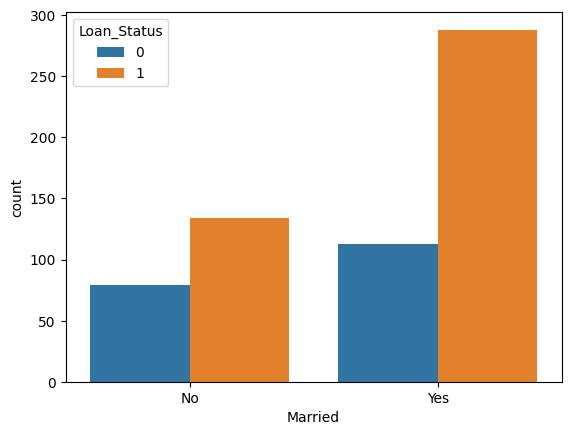

In [24]:
sns.countplot(data= data,x = 'Married',hue = 'Loan_Status')

## Observations:

We can see that Married customers are more likely to get loans.

<Axes: xlabel='Property_Area', ylabel='count'>

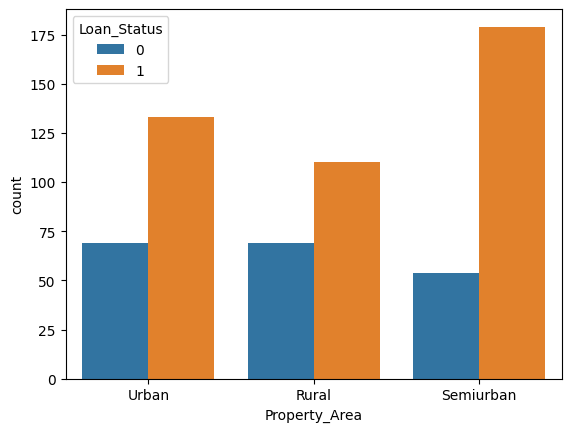

In [25]:
sns.countplot(data= data,x = 'Property_Area',hue = 'Loan_Status')

## Observations:

1.The plot shows that more loans are approved for properties in semi-urban areas.


2.This could be due to several reasons. The bank might be charging higher interest rates for semi-urban areas or the current customer base of the company from semi-urban areas might actually be more eligible for home loans based on loan applicant features. We cannot be certain as we don't have the data to support this claim.

<Axes: xlabel='Credit_History', ylabel='count'>

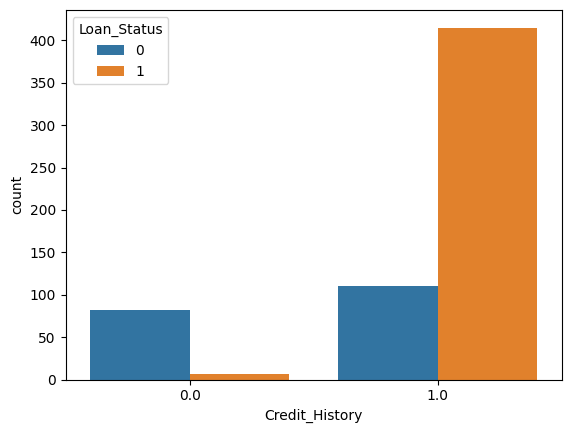

In [26]:
sns.countplot(data= data,x = 'Credit_History',hue = 'Loan_Status')

## Observations

1.The plot shows that credit history is an important factor while checking loan eligibility. There are very few customers whose loan was approved even when their credit history did not meet required guidelines.

#  Step 5:- Preparing Data for Modeling

Models cannot take non-numeric inputs. So, we will first create dummy variables for all the categorical variables

In [27]:
data.replace({'Married':{'No':0,'Yes': 1}},inplace = True)

In [28]:
data.replace({'Education':{'Not Graduate':0,'Graduate': 1}},inplace = True)

In [29]:
data.replace({'Self_Employed':{'No':0,'Yes': 1}},inplace = True)

In [30]:
data.replace({'Gender':{'Female':0,'Male': 1}},inplace = True)

In [31]:
data.replace({'Property_Area':{'Rural':0,'Urban': 1,'Semiurban':2}},inplace = True)

In [32]:
data['Dependents'] = data['Dependents'].astype(int)


In [33]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,1,0,5849,0.0,128.0,360.0,1.0,1,1
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,1,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,1,1
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,1,1


<Axes: >

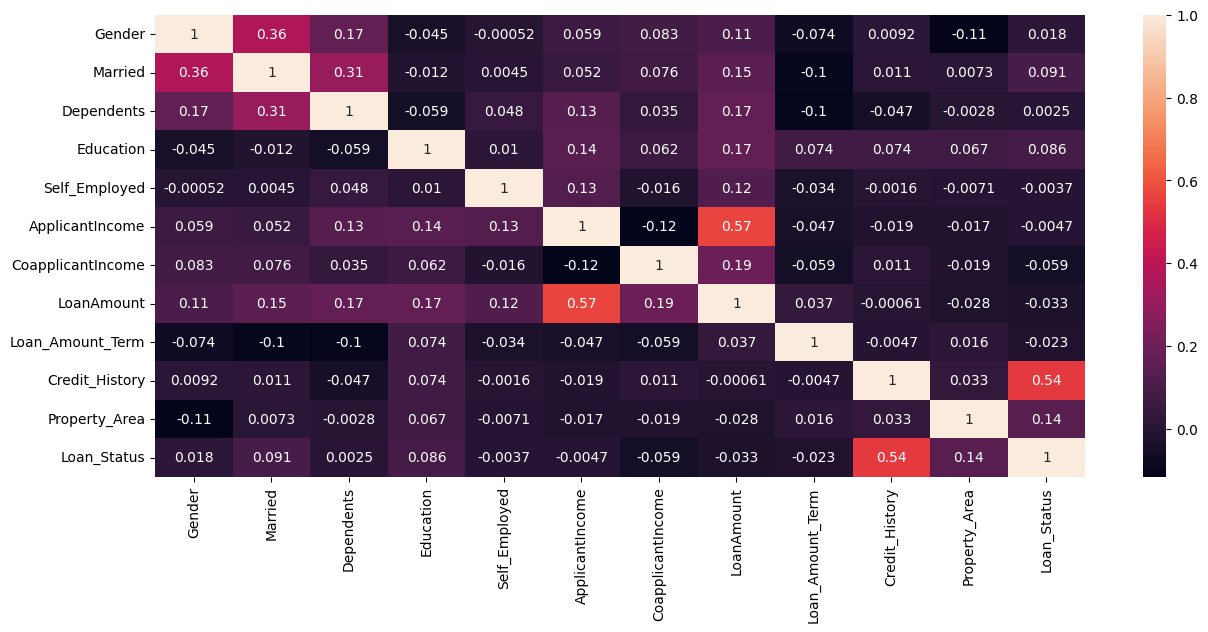

In [34]:
plt.figure(figsize=(15,6))

sns.heatmap(data.corr(),annot = True)

# Step 6:- Train-Test Split 

In [35]:
#diving the data into dependent and independent variables
x = data.drop(columns = ['Loan_Status','Loan_ID'],axis =1)
y = data['Loan_Status']

In [36]:
x

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0,1,0,5849,0.0,128.0,360.0,1.0,1
1,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0
2,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,1
3,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,1
4,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,1,0,2900,0.0,71.0,360.0,1.0,0
610,1,1,4,1,0,4106,0.0,40.0,180.0,1.0,0
611,1,1,1,1,0,8072,240.0,253.0,360.0,1.0,1
612,1,1,2,1,0,7583,0.0,187.0,360.0,1.0,1


array([[<Axes: title={'center': 'ApplicantIncome'}>,
        <Axes: title={'center': 'CoapplicantIncome'}>],
       [<Axes: title={'center': 'LoanAmount'}>,
        <Axes: title={'center': 'Loan_Amount_Term'}>]], dtype=object)

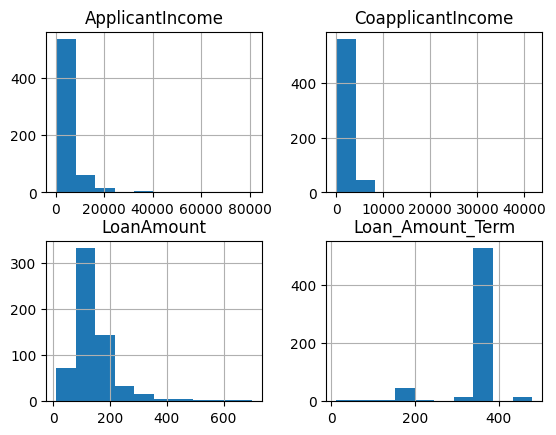

In [37]:
x[['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']].hist()

Since distribution of the variables are looks like normal , its look like skewed distribution. Thats why I used Min_Max Scaler
to Scale the data.

In [38]:
# min-max normalization (numeric variables)
min_max_columns = ['ApplicantIncome', 'CoapplicantIncome','LoanAmount' ,'Loan_Amount_Term' ]

# scale numerical variables using min max scaler
for column in min_max_columns:
        # minimum value of the column
        min_column = x[column].min()
        # maximum value of the column
        max_column = x[column].max()
        # min max scaler
        x[column] = (x[column] - min_column) / (max_column - min_column)

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2,random_state=42)

In [41]:
x_train.shape

(491, 11)

In [42]:
x_test.shape

(123, 11)

In [43]:
 y_train.shape

(491,)

In [44]:
y_test.shape

(123,)

In [45]:
# balance data
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
x_resample, y_resample = oversample.fit_resample(x_train, y_train)

# Step 7:- Building Classification Models

In [46]:
import pandas as pd
import statsmodels.api as sm

In [47]:
model= sm.Logit(y_train,x_train)
result = model.fit()

Optimization terminated successfully.
         Current function value: 0.465340
         Iterations 6


In [48]:
# Print model summary
print(result.summary())

                           Logit Regression Results                           
Dep. Variable:            Loan_Status   No. Observations:                  491
Model:                          Logit   Df Residuals:                      480
Method:                           MLE   Df Model:                           10
Date:                Mon, 28 Aug 2023   Pseudo R-squ.:                  0.2418
Time:                        12:48:24   Log-Likelihood:                -228.48
converged:                       True   LL-Null:                       -301.36
Covariance Type:            nonrobust   LLR p-value:                 2.776e-26
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Gender               -0.4488      0.323     -1.391      0.164      -1.081       0.183
Married               0.4958      0.263      1.889      0.059      -0.019       1.010
Dependents            0.

In [49]:
Y1_prediction=result.predict(x_test)

In [50]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

In [51]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

In [52]:
#Compute the false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test,Y1_prediction)

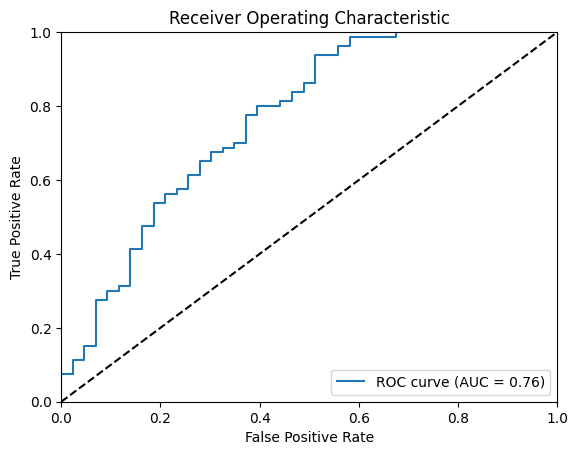

In [53]:
# Compute the AUC (Area Under the Curve)
auc = roc_auc_score(y_test,Y1_prediction)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (AUC = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], 'k--')  # Plotting the diagonal line (random classifier)
plt.xlim(0,1)
plt.ylim(0,1)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

In [54]:
# Find the index of the optimal threshold point based on Youden's index
youden_index = tpr - fpr
optimal_threshold_index = np.argmax(youden_index)
optimal_threshold = thresholds[optimal_threshold_index]
optimal_tpr = tpr[optimal_threshold_index]
optimal_fpr = fpr[optimal_threshold_index]
print(f"Optimal Threshold: {optimal_threshold}")
print(f"Optimal TPR: {optimal_tpr}")
print(f"Optimal FPR: {optimal_fpr}")

Optimal Threshold: 0.7066672226136728
Optimal TPR: 0.9375
Optimal FPR: 0.5116279069767442


In [55]:
# Make predictions
binary_predictions = (Y1_prediction >=0.7560869885360465).astype(int)

# Calculate classification metrics
confusion = confusion_matrix(y_test, binary_predictions)
precision = precision_score(y_test, binary_predictions)
recall = recall_score(y_test, binary_predictions)
f1 = f1_score(y_test, binary_predictions)

# Print the metrics
print("Confusion Matrix:")
print(confusion)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

Confusion Matrix:
[[27 16]
 [18 62]]
Precision: 0.7948717948717948
Recall: 0.775
F1-Score: 0.7848101265822786


# Feature Selection using Lasso Regularzation 

In [56]:
### Apply Feature Selection

# The bigger the alpha the less features that will be selected.
from sklearn.linear_model import Lasso, LogisticRegression
from sklearn.feature_selection import SelectFromModel
# Then I use the selectFromModel object from sklearn, which
# will select the features which coefficients are non-zero
feature_sel_model = SelectFromModel(Lasso(alpha=0.005, random_state=0)) # remember to set the seed, the random state in this function
feature_sel_model.fit(x_train,y_train)

SelectFromModel(estimator=Lasso(alpha=0.005, random_state=0))

In [57]:
feature_sel_model.get_support()

array([False,  True,  True,  True, False, False, False, False, False,
        True,  True])

In [58]:
# let's print the number of total and selected features

# this is how we can make a list of the selected features
selected_feat =x.columns[(feature_sel_model.get_support())]

# let's print some stats
print('total features: {}'.format((x.shape[1])))
print('selected features: {}'.format(len(selected_feat)))

total features: 11
selected features: 5


In [59]:
x1=x[selected_feat]

In [60]:
x1

,Married,Dependents,Education,Credit_History,Property_Area
0,0,0,1,1.0,1
1,1,1,1,1.0,0
2,1,0,1,1.0,1
3,1,0,0,1.0,1
4,0,0,1,1.0,1
...,...,...,...,...,...
609,0,0,1,1.0,0
610,1,4,1,1.0,0
611,1,1,1,1.0,1
612,1,2,1,1.0,1


In [61]:
x1_train, x1_test, y1_train, y1_test = train_test_split(x1,y, test_size=0.2,random_state=42)

In [62]:
model3= sm.Logit(y1_train,x1_train)
result3 = model3.fit()

Optimization terminated successfully.
         Current function value: 0.515294
         Iterations 6


In [63]:
print(result3.summary())

                           Logit Regression Results                           
Dep. Variable:            Loan_Status   No. Observations:                  491
Model:                          Logit   Df Residuals:                      486
Method:                           MLE   Df Model:                            4
Date:                Mon, 28 Aug 2023   Pseudo R-squ.:                  0.1604
Time:                        12:48:55   Log-Likelihood:                -253.01
converged:                       True   LL-Null:                       -301.36
Covariance Type:            nonrobust   LLR p-value:                 4.948e-20
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Married           -0.0609      0.225     -0.270      0.787      -0.503       0.381
Dependents        -0.0393      0.093     -0.424      0.671      -0.221       0.142
Education         -0.8396      0.254

In [64]:
Y2_prediction=result3.predict(x1_test)

In [65]:
#Compute the false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y1_test,Y2_prediction)

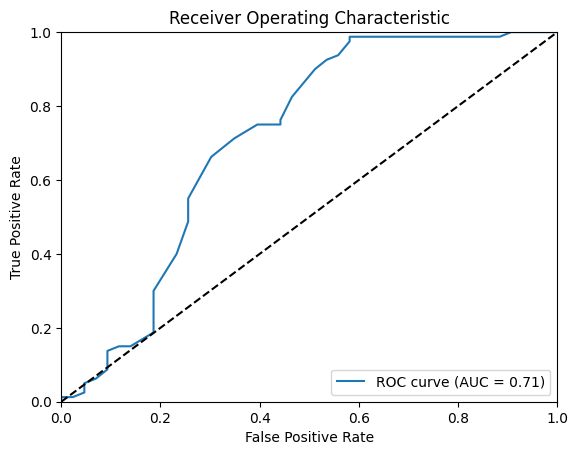

In [66]:
# Compute the AUC (Area Under the Curve)
auc = roc_auc_score(y1_test,Y2_prediction)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (AUC = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], 'k--')  # Plotting the diagonal line (random classifier)
plt.xlim(0,1)
plt.ylim(0,1)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

In [67]:
# Find the index of the optimal threshold point based on Youden's index
youden_index = tpr - fpr
optimal_threshold_index = np.argmax(youden_index)
optimal_threshold = thresholds[optimal_threshold_index]
optimal_tpr = tpr[optimal_threshold_index]
optimal_fpr = fpr[optimal_threshold_index]
print(f"Optimal Threshold: {optimal_threshold}")
print(f"Optimal TPR: {optimal_tpr}")
print(f"Optimal FPR: {optimal_fpr}")

Optimal Threshold: 0.7267055113188864
Optimal TPR: 0.9875
Optimal FPR: 0.5813953488372093


In [68]:
# Make predictions
binary_predictions = (Y2_prediction >=0.72).astype(int)

# Calculate classification metrics
confusion = confusion_matrix(y1_test, binary_predictions)
precision = precision_score(y1_test, binary_predictions)
recall = recall_score(y1_test, binary_predictions)
f1 = f1_score(y1_test, binary_predictions)

# Print the metrics
print("Confusion Matrix:")
print(confusion)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

Confusion Matrix:
[[18 25]
 [ 1 79]]
Precision: 0.7596153846153846
Recall: 0.9875
F1-Score: 0.8586956521739131


## 1. Logistic Regression Model

In [69]:
from sklearn.linear_model import LogisticRegression

In [70]:
lm = LogisticRegression()
lm.fit(x_train,y_train)
predictions = lm.predict(x_test)
predictions

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [71]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [72]:
print(confusion_matrix(y_test,predictions))

[[18 25]
 [ 1 79]]


In [73]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.95      0.42      0.58        43
           1       0.76      0.99      0.86        80

    accuracy                           0.79       123
   macro avg       0.85      0.70      0.72       123
weighted avg       0.83      0.79      0.76       123



In [74]:
accuracy_score(y_test,predictions)

0.7886178861788617

## observation
1.We see around 80% accuracy on our test dataset.


2.The recall score is only 44% for class 0. 

# Step 8 :- Model evaluation criterion:

Since this is a binary classification problem, the model can make wrong predictions in one of two ways:

1.Predicting a customer is not eligible for a loan when the customer actually is eligible - Loss of opportunity.


2.Predicting a customer is eligible for a loan when the customer is actually not - Financial loss.


Which case is more important?


Predicting that the customer is eligible when he is not, because the person might default or not be able to return the loan, which would result in financial loss to the company.


How to reduce this loss i.e need to reduce False Negatives?


In classification, the class of interest is considered the positive class. Here, the class of interest is 0 i.e. identifying non-eligible customers. So, the company wants to minimize the number of false negatives, in other words Recall is the evaluation criterion to be maximized.

# Conclusion
1.Using multiple models, EDA, and visualization, we were able to identify the key factors that are involved with whether or not a loan application will be accepted, with the biggest one being credit history.



2.Our Logistic regression model gave thet highest recall score which is the measure that we wanted to maximize, since we don't want to grant loans to applicants who are unable to repay them, since it would hurt the company.